## <center> **Prediction of Student Performance Based on Individual and Environmental Characteristics**
#### <center> **Directed by  Elauïne BERNARD** 
####  <center> **Statistician, Econometrician / Data scientist** 

### Context
This work aims to identify robust predictive models that can be used to anticipate students' academic results based on their behavior (such as study hours, motivation) and their environment (such as parental involvement, internet access, and school type). Such predictions would allow teachers and institutions to implement preventive and support strategies to improve student performance.

### Objectives
Use a machine learning model to predict students' exam scores based on their individual and environmental characteristics.

### Plan
1. Data Import and Processing
2. Exploratory Data Analysis
3. Feature Engineering
4. Model Training
5. Model Testing
6. Examples of predictions

### Importating  packages

In [112]:
import os
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error,r2_score

### **1-Data import and processing**

In [6]:
# Work directory definition
new_directory = r"C:\Users\berna\Documents\Portfolio\data"
os.chdir(new_directory)

In [9]:
# Source: The dataset was loaded locally from the Kaggle site (https://www.kaggle.com/)
#1.1- Import data
Base=pd.read_csv("StudentPerformanceFactors.csv")
# View of first rows
Base.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [11]:
#1.2- Basic information
Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

**The dataset has 20 variables and 6607 rows.** 
- The variable of interest is Exam_Score. It measures the student's performance on the exam. This is the variable we want to predict.
- The variables concerning the student's individual characteristics are: Hours_Studied,attendance,Sleep_Hours,Previous_Scores,Extracurricular_Activities,Motivation_Level,Physical_Activity,Learning_Disabilities,Gender
- The variables concerning the student's environmental characteristics are: Parental_Involvement,Access_to_Resources,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Parental_Education_Level,Distance_from_Home
 
- All variables have been defined in the correct type

In [14]:
# 1.3- Management of missing values
#1.3.1- Displaying variables with missing values
missing_values=Base.isna().sum()
missing_values=missing_values[missing_values>0]
print("They are", len(missing_values), "variables with missing values :")
print("   ")
print(missing_values)

They are 3 variables with missing values :
   
Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


In [16]:
# 1.3.2- Processing missing values
# Imput the mode of Teacher_Quality according to the variable School_Type to the missing values of the variable Teacher_Quality
Base['Teacher_Quality']=Base['Teacher_Quality'].fillna(Base.groupby('School_Type')['Teacher_Quality'].transform(lambda x:x.mode()[0]))

# Remove missing values for other variables
Base.dropna(inplace=True)

# Final check for missing values
missing_values=Base.isna().sum()
missing_values=missing_values[missing_values>0]
print("They are", len(missing_values), "variable(s) with missing values ")
print("Now, the database has ", len(Base), " rows")

They are 0 variable(s) with missing values 
Now, the database has  6450  rows


### **2- Exploratory Data Analysis** 

#### 2.1-Displaying basic descriptive statistics for numerical variables

In [20]:
Base.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6450.000000,6450.000000,6450.000000,6450.000000,6450.000000,6450.000000,6450.000000
mean,19.975504,79.995504,7.033953,75.091938,1.496124,2.971938,67.246512
std,5.991338,11.551491,1.468413,14.391781,1.233255,1.028507,3.904148
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


- Students study an average of 19.9 hours during the course. They study for at least 1 hour and at most 44 hours. There is very little dispersion for this variable.
- Each student attended at least 60 of the 100 lessons given. And some students attended all 100 sessions.
- Students sleep an average of 7 hours per night during training. There is very little dispersion in this variable.
- Students scored an average of 75 on the exam. The minimum score obtained is 50 and the maximum score is 100. 25% of students had a score higher than 88 on the past exam.
- Some students had turoring sessions and others did not. Those who did had a maximum of 8 hours of tutoring. 75% of students had less than 2 hours of tutoring.
- Students averaged between 0 and 6 hours of physical activity per week during the training period.
- Student scores for this exam ranged from 55 to 101. There are therefore some outliers, as the maximum possible score for this exam is 100. We will delete the observations with outliers.

In [23]:
# Supression of observations with outliers for the Exam_Score variable
Base=Base[Base['Exam_Score']<=100]
print("Now, the data set has ",len(Base), "rows")
print("The average student score for this exam is therefore: ", round(Base["Exam_Score"].mean(),2))

Now, the data set has  6449 rows
The average student score for this exam is therefore:  67.24


#### 2.2-Displaying frequency table for categorical variables

In [26]:
# Select categorical columns
categorical_columns = Base.select_dtypes(include=['object', 'category']).columns

# Create a frequency table for each categorical column
for col in categorical_columns:
    print(f"Frequency for the variable '{col}':")
    print(Base[col].value_counts(normalize=True))  # Display the frequency table
    print("\n")  # Add space after each table

Frequency for the variable 'Parental_Involvement':
Parental_Involvement
Medium    0.509846
High      0.288107
Low       0.202047
Name: proportion, dtype: float64


Frequency for the variable 'Access_to_Resources':
Access_to_Resources
Medium    0.502403
High      0.298186
Low       0.199411
Name: proportion, dtype: float64


Frequency for the variable 'Extracurricular_Activities':
Extracurricular_Activities
Yes    0.596216
No     0.403784
Name: proportion, dtype: float64


Frequency for the variable 'Motivation_Level':
Motivation_Level
Medium    0.507365
Low       0.292604
High      0.200031
Name: proportion, dtype: float64


Frequency for the variable 'Internet_Access':
Internet_Access
Yes    0.924174
No     0.075826
Name: proportion, dtype: float64


Frequency for the variable 'Family_Income':
Family_Income
Low       0.404869
Medium    0.402543
High      0.192588
Name: proportion, dtype: float64


Frequency for the variable 'Teacher_Quality':
Teacher_Quality
Medium    0.604435
High   

- Parental_Involvement: Most students have medium parental involvement (50.98%), followed by high (28.81%) and low (20.20%) involvement.
- Access_to_Resources: A majority of students have medium access to resources (50.24%), with fewer having high (29.82%) or low (19.94%) access.
- Extracurricular_Activities: The majority of students participate in extracurricular activities (59.62%), while 40.38% do not.
- Motivation_Level: Most students have medium motivation (50.74%), followed by low motivation (29.26%) and high motivation (20.00%).
- Internet_Access: Nearly all students have internet access (92.42%), while only a small percentage (7.58%) do not.
- Family_Income: The family income distribution is nearly evenly split between low (40.49%) and medium (40.25%), with fewer students coming from high-income families (19.26%).
- Teacher_Quality: Most students rate their teacher quality as medium (60.44%), followed by high (29.52%), with only 10.03% rating it as low.
- School_Type: A large majority of students attend public schools (69.55%), while 30.45% attend private schools.
- Peer_Influence: Peer influence is nearly equally divided between positive (40.04%) and neutral (39.12%), with negative peer influence affecting a smaller group (20.84%).
- Learning_Disabilities: The vast majority of students do not have learning disabilities (89.55%), while 10.45% do.
- Parental_Education_Level: Nearly half of the students' parents have a high school education (49.50%), followed by college graduates (30.45%) and postgraduates (20.05%).
- Distance_from_Home: Most students live near the school (59.44%), with fewer living at moderate distances (30.47%) or far away (10.09%).
- Gender: The majority of students are male (57.73%), while females represent 42.27%.

#### 2.3- Analysis of the relationship between exam score and individual student characteristics

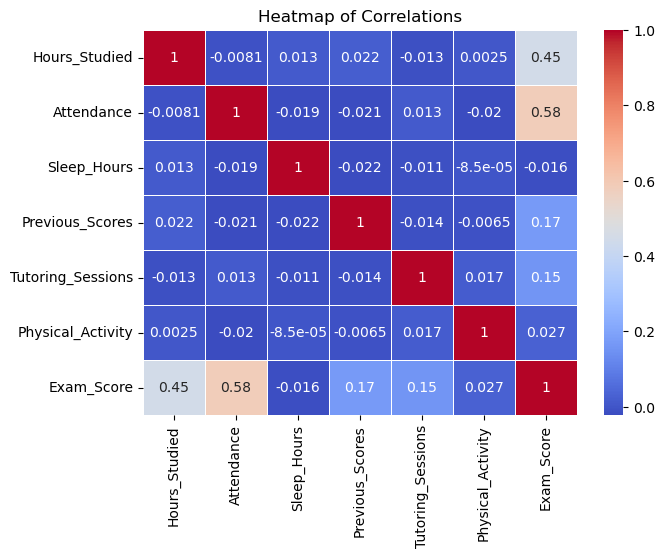

In [30]:
# List of numerical variables to correlate with the target variable
variables_numeriques = Base.select_dtypes(include="int").columns

# Calculate correlations between the numerical variables and the target variable
correlation_matrix = Base[variables_numeriques].corr()

# Plot the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()


Looking at the correlation heatmap, we can see that the **Attendance** variable has a strong positive correlation (0.58) with the Exam_Score, making it a relevant candidate for the prediction model. Additionally, **Hours_Studied** shows a moderate correlation (0.45) with the exam score, indicating that it could also significantly impact student performance. Other variables, such as **Previous_Scores** and **Tutoring_Sessions**, have low but positive correlations, so they could be included in the model, but with less importance.

In [33]:
# Creating function to visualize the relationship between categorizable variables and numeric variables
def plot_categorical_vs_numeric(categorical_vars, numeric_var, colors, df, cols=5):
    """
    Plots bar charts for each categorical variable against a numeric variable, 
    arranging the charts in a grid for better readability.

    Parameters:
    - categorical_vars: List of categorical variables to plot
    - numeric_var: The numerical variable to plot against
    - colors: List of colors for each bar chart
    - df: The dataframe containing the data
    - cols: Number of columns in the grid (default is 5)
    """
    # Calculate number of rows needed
    rows = (len(categorical_vars) + cols - 1) // cols  # This ensures we have enough rows
    
    # Create a grid of subplots with the appropriate number of rows and columns
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))

    # Flatten axes array for easy indexing if more than 1 row is used
    axes = axes.flatten()

    # Loop over categorical variables and plot them
    for i, cat_var in enumerate(categorical_vars):
        sns.barplot(x=cat_var, y=numeric_var, data=df, ax=axes[i], color=colors[i % len(colors)])  # Handle color cycling
        axes[i].set_title(f'{cat_var} vs {numeric_var}')
        axes[i].set_xlabel(cat_var)
        axes[i].set_ylabel(numeric_var)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to avoid overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

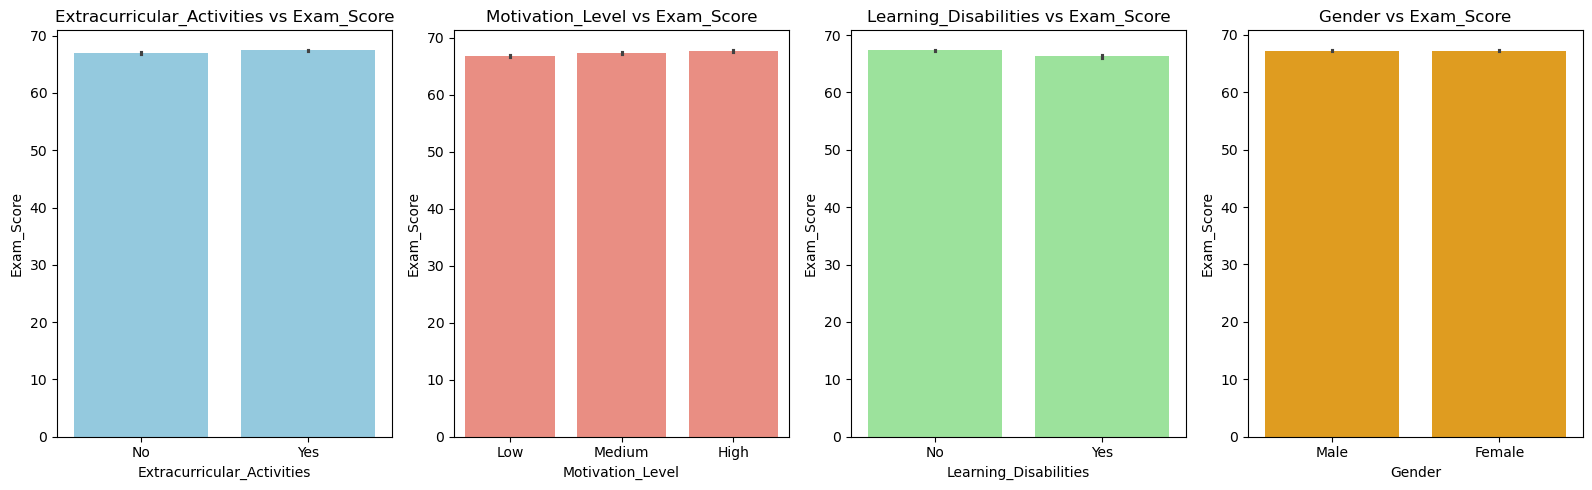

In [35]:
# Using function plot_categorical_vs_numeric
categorical_vars = ['Extracurricular_Activities', 'Motivation_Level', 'Learning_Disabilities', 'Gender']
# List of colors for each graph
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'gold', 'lightpink', 'lightcoral', 'lightgray', 'turquoise']
# Call the function (assuming 'Base' is your DataFrame and 'Exam_Score' is the numeric variable)
plot_categorical_vs_numeric(categorical_vars, 'Exam_Score', colors, Base)

Based on the four bar charts comparing Exam_Score with different categorical variables, here are the observations:
- Extracurricular_Activities: Whether students participate in extracurricular activities or not does not seem to have a significant impact on their exam scores. Both groups have similar average scores.
- Motivation_Level: Although the motivation levels are categorized as "Low," "Medium," and "High," there is no significant difference in exam scores across these groups. This suggests that perceived motivation does not have a direct observable impact on student performance.
- Learning_Disabilities: Students with and without learning disabilities appear to perform similarly on the exam. There is no noticeable difference between these two groups, indicating that other factors may offset the effect of this variable.
- Gender: The exam scores for male and female students are also very similar, showing no substantial gender-related performance difference.

In summary, these categorical variables (extracurricular activities, motivation level, learning disabilities, gender) do not show significant correlations with exam scores in this dataset when considered individually.

#### 2.4- Analysis of the relationship between exam score and environmental student characteristics

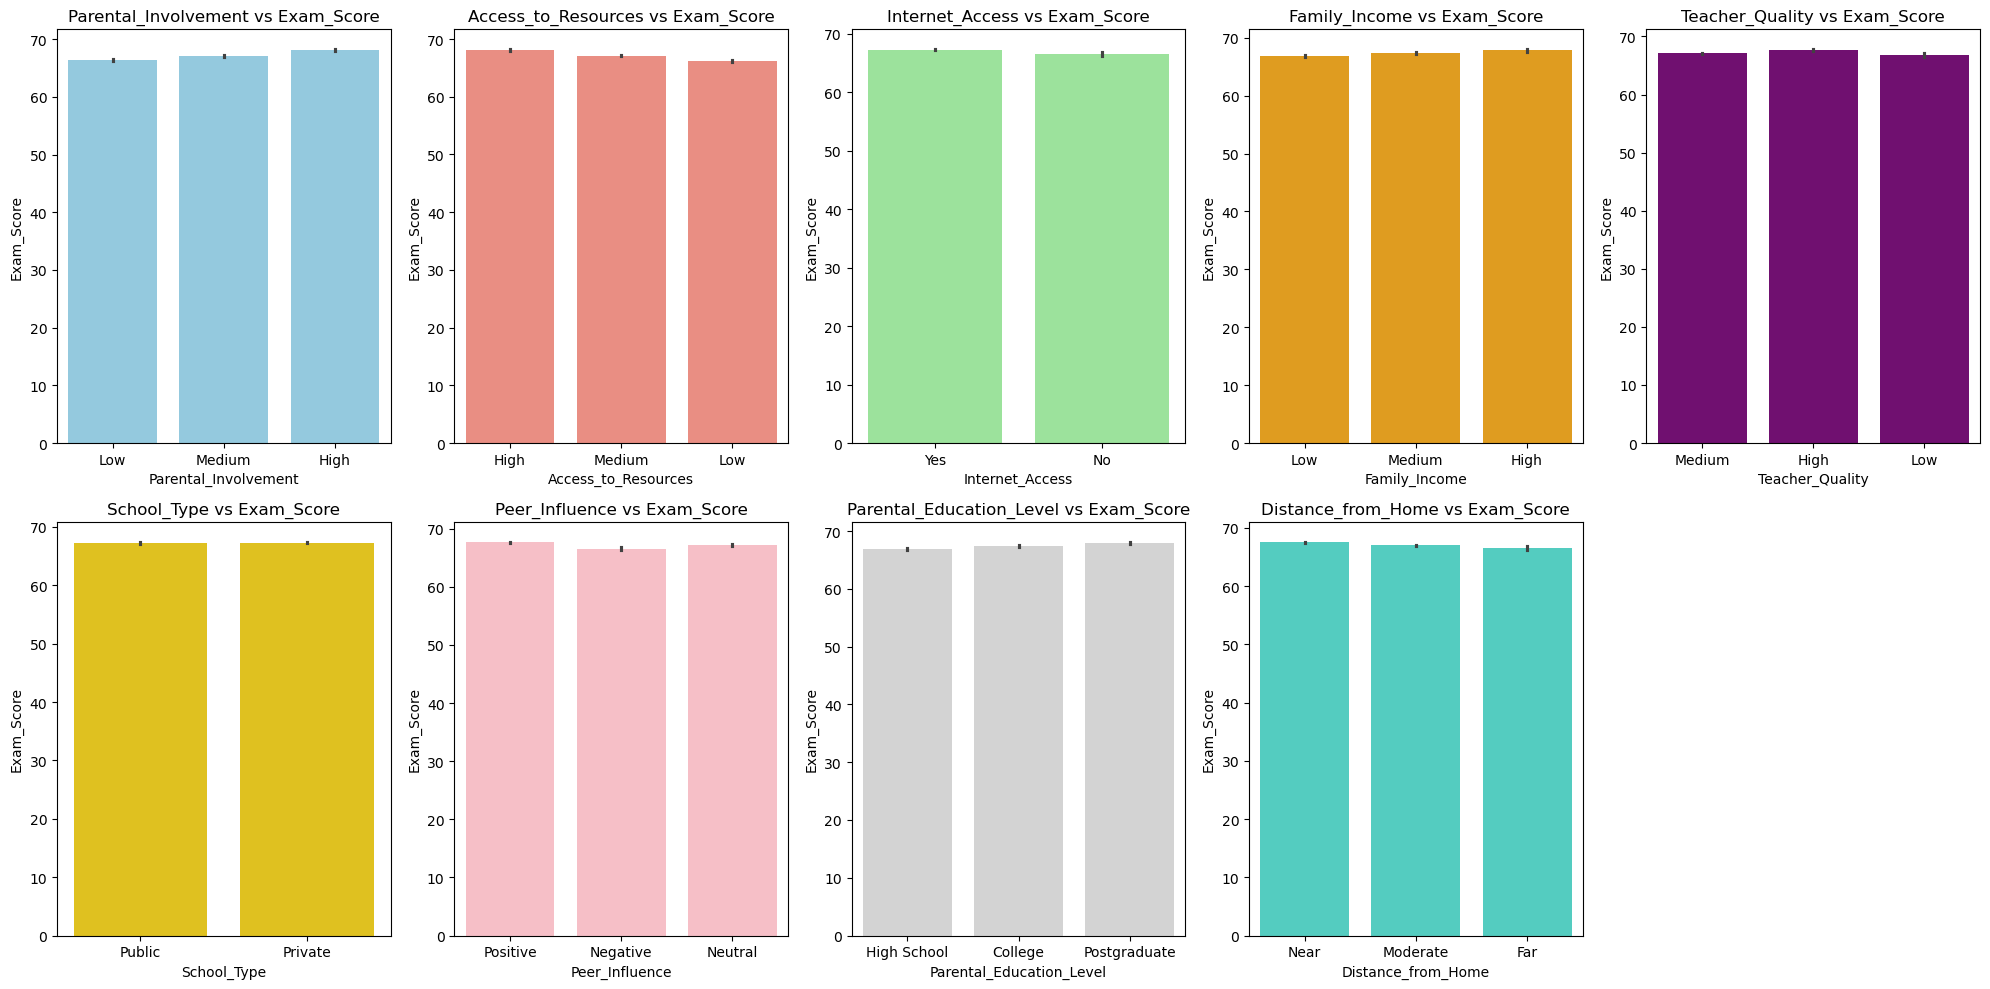

In [38]:
# Using function plot_categorical_vs_numeric
categorical_vars2 = ['Parental_Involvement','Access_to_Resources','Internet_Access','Family_Income','Teacher_Quality','School_Type','Peer_Influence','Parental_Education_Level','Distance_from_Home']
# Create a 2x2 plot grid for displaying bar charts
# List of colors for each graph
colors2 = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'gold', 'lightpink', 'lightgray', 'turquoise']
# Call the function (assuming 'Base' is your DataFrame and 'Exam_Score' is the numeric variable)
plot_categorical_vs_numeric(categorical_vars2, 'Exam_Score', colors2, Base)

- **Teacher_Quality**: There is a slight difference in exam scores based on teacher quality, suggesting that better teacher quality correlates with higher exam scores. This could be an important predictor.
- **Parental_Education_Level**: There are small variations in exam scores based on the parental education level, with higher education levels leading to slightly better scores. This might be relevant for the model.
- **Peer_Influence**: Positive peer influence is associated with slightly higher exam scores compared to negative or neutral influences. Peer influence might have some impact on student performance.
- **Access_to_Resources**: shows slight variations in exam scores. Students with high access to resources tend to have marginally better scores than those with medium or low access.

These  variables show noticeable differences in the context of exam scores and may contribute meaningfully to the predictive model. 

### 3- Feature engineering

#### 3.1-Handling Categorical Variables
We encode categorical variables using two techniques :
- One-Hot Encoding (For variables with no inherent order) : School_Type, Peer_Influence 
- Ordinal Encoding (For variables with a meaningful order): Teacher_Quality,Parental_Education_Level,Parental_Involvement,Family_Income,Access_to_Resources

In [43]:
# Step 1: One-Hot Encoding 
# data for one-hot encoding
data_one_hot=Base[['School_Type', 'Peer_Influence']]
# One-Hot encoder initialization
onehot_encoder = OneHotEncoder(drop='first',sparse_output=False)
# Apply ordinal encoding to columns
onehot_encoded = onehot_encoder.fit_transform(data_one_hot)
# Create a DataFrame with encoded columns
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['School_Type', 'Peer_Influence']))

# Step 2: Ordinal Encoding 
# data for ordinal encoding
data_ordored=Base[['Teacher_Quality','Parental_Education_Level','Parental_Involvement','Family_Income','Access_to_Resources']]
# Mappings for ordered variables 
ordinal_mappings = [
    ['Low', 'Medium', 'High'],  # Teacher_Quality
    ['High School', 'College', 'Postgraduate'],  # Parental_Education_Level
    ['Low', 'Medium', 'High'],  # Parental_Involvement
    ['Low', 'Medium', 'High'],  # Family_Income
    ['Low', 'Medium', 'High']   # Access_to_Resources
]

# Initialization of ordinal encoder with mappings of defined order
ordinal_encoder = OrdinalEncoder(categories=ordinal_mappings)
# Apply ordinal encoding to columns
ordinal_encoded = ordinal_encoder.fit_transform(data_ordored)

#Create a DataFrame with encoded columns
ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=['Teacher_Quality', 'Parental_Education_Level', 
                                                            'Parental_Involvement', 'Family_Income', 'Access_to_Resources'])
# Step 3: Combining dataframe
categorical_df=pd.concat([onehot_encoded_df,ordinal_encoded_df],axis=1)

#### 3.2-Handling Numeric Variables
We will standardize the numerical variables

In [45]:
# Numerical variables
numerical_df=Base[['Attendance','Hours_Studied','Previous_Scores', 'Tutoring_Sessions']]
# Initialiszation of StandardScaler
scaler = StandardScaler()
# Apply standardization to numerical_df 
numeric_scaled = scaler.fit_transform(numerical_df)
# Créer un DataFrame avec les variables standardisées
numeric_scaled_df = pd.DataFrame(numeric_scaled, columns=numerical_df.columns)

#### 3.3- Dataset for modeling

In [48]:
df_model=pd.concat([categorical_df,numeric_scaled_df],axis=1)
df_model.head(3)

,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Teacher_Quality,Parental_Education_Level,Parental_Involvement,Family_Income,Access_to_Resources,Attendance,Hours_Studied,Previous_Scores,Tutoring_Sessions
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.346972,0.505047,-0.145181,-1.213470
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,-1.384733,-0.162655,-1.118075,0.409271
2,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,1.559165,0.671973,1.105683,0.409271


### 4- Model Training

In [53]:
# Target data
y=Base['Exam_Score']
# Features data
X=df_model
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Model 1: Linear regression
# Block futur warning
warnings.filterwarnings("ignore", category=FutureWarning)

reg = LinearRegression()
# Using RMSE as metric 
scorer = make_scorer(mean_squared_error, squared=False)
# Cross validation with 5 folds 
cv_scores = cross_val_score(reg, X_train, y_train, cv=5, scoring=scorer)

print(" RMSE for each fold:", cv_scores)
print("Mean of RMSE  :", cv_scores.mean())

 RMSE for each fold: [2.20874147 1.97699762 2.45607041 1.9573257  2.04225365]
Mean of RMSE  : 2.128277768202813


In [108]:
# Model 2: Decision Tree
dt = DecisionTreeRegressor(max_depth=5,random_state=42)
# Cross validation with 5 folds 
cv_scores_rf = cross_val_score(dt, X, y, cv=5, scoring=scorer)

print("RMSE for each fold :", cv_scores_rf)
print("Mean of RMSE :", cv_scores_rf.mean())

RMSE for each fold : [3.00845435 2.66344934 2.80457621 2.71220074 2.45220658]
Mean of RMSE : 2.728177445290816


On training data, the regression model seems to outperform the decision tree model.

### 5- Model Testing and model selection

In [114]:
# Test for regression model
reg.fit(X_train, y_train)
y_pred_test1 = reg.predict(X_test)
# Calculating evaluation metrics : RMSE and R²
rmse_test1 = mean_squared_error(y_test, y_pred_test1, squared=False)  
r2_test1 = r2_score(y_test, y_pred_test1)  
print("Regression result: RMSE=",rmse_test1," R²=",r2_test1)

# Test for decision tree model
dt.fit(X_train, y_train)
y_pred_test2 = dt.predict(X_test)
# Calculating evaluation metrics : RMSE and R
rmse_test2 = mean_squared_error(y_test, y_pred_test2, squared=False)  
r2_test2 = r2_score(y_test, y_pred_test2)
print("Decision Tree result: RMSE=",rmse_test2," R²=",r2_test2)

Regression result: RMSE= 2.200706579027075  R²= 0.677951237231689
Decision Tree result: RMSE= 2.696539886504923  R²= 0.5164837785613575


The linear regression model has the lowest RMSE, so we chose it as the best model.

### 6- Examples of predictions

In [123]:
# Creating a new DataFrame , we wil predict the Exam_Score for two students
new_data = pd.DataFrame({
    'School_Type_Public': [0.0, 1.0],
    'Peer_Influence_Neutral': [1.0, 0.0],
    'Peer_Influence_Positive': [0.0, 1.0],
    'Teacher_Quality': [2.0, 0.0],
    'Parental_Education_Level': [2.0, 1.0],
    'Parental_Involvement': [1.0, 0.0],
    'Family_Income': [2.0, 0.0],
    'Access_to_Resources': [2.0, 1.0],
    'Attendance': [0.500, -0.300],
    'Hours_Studied': [0.400, -0.600],
    'Previous_Scores': [0.200, -0.500],
    'Tutoring_Sessions': [0.500, 1.000]
})
new_data.head()

,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Teacher_Quality,Parental_Education_Level,Parental_Involvement,Family_Income,Access_to_Resources,Attendance,Hours_Studied,Previous_Scores,Tutoring_Sessions
0,0.0,1.0,0.0,2.0,2.0,1.0,2.0,2.0,0.5,0.4,0.2,0.5
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.3,-0.6,-0.5,1.0


In [127]:
# Predictions
predictions = reg.predict(new_data)
print(predictions)

[71.8988179  64.13700253]
